# Data Cleaning, Exploration, and Analysis of BND Dataset

## 1. Data Cleaning and Understanding
The initial step involves cleaning and gaining a comprehensive understanding of the BND dataset to ensure data quality and prepare it for analysis. We will:
   - **Check Basic Statistics**: Summarize basic statistics of each feature (e.g., mean, median, standard deviation) to understand the data distribution.
   - **Ensure Appropriate Data Types**: Confirm all columns have appropriate data types, particularly for date and numeric columns.
   - **Handle Missing Values**: Identify any missing values and handle them appropriately. Missing values will either be filled, interpolated, or removed based on their patterns and potential impact.
   - **Normalization or Scaling**: Normalize or scale the data as needed, especially for machine learning models that require consistent feature scaling.

## 2. Exploratory Data Analysis (EDA)
Exploratory Data Analysis helps us identify patterns, trends, and potential anomalies in the BND dataset. Key steps include:
   - **Trend Visualization**: Plot the closing price over time to observe general trends and potential seasonal patterns.
   - **Daily Percentage Change**: Calculate and visualize the daily percentage change to measure price volatility and identify significant swings.
   - **Rolling Means and Standard Deviations**: Compute and plot rolling means and standard deviations to capture short-term trends and fluctuations.
   - **Outlier Detection**: Identify any unusual observations through statistical methods or visualization, helping pinpoint anomalies.
   - **High/Low Return Analysis**: Analyze and highlight specific days with unusually high or low returns, providing insights into extreme market movements.

## 3. Seasonality and Trend Analysis
To better understand the periodic behavior of the dataset, we will decompose the time series data:
   - **Decomposition of Time Series**: Using tools such as `statsmodels`, we will break down the time series into trend, seasonal, and residual components, providing a clearer view of underlying seasonal patterns and long-term trends.

## 4. Volatility Analysis
Finally, volatility will be assessed through rolling calculations to understand the nature of price fluctuations over time:
   - **Rolling Means and Standard Deviations**: Calculate and visualize rolling statistics over different time windows to observe changes in short-term trends and volatility. This will help us identify periods of high market uncertainty and risk.

This series of tasks will provide a robust understanding of the BND dataset, allowing for enhanced predictive modeling and strategic insights into market behavior.

In [8]:
# Load the dataset
import pandas as pd
df = pd.read_csv("../data/BND_historical_data.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2015-01-02,82.430000,82.690002,82.419998,82.650002,63.358776,2218800
1,1,2015-01-05,82.739998,82.919998,82.699997,82.889999,63.542755,5820100
2,2,2015-01-06,83.029999,83.379997,83.029999,83.129997,63.726746,3887600
3,3,2015-01-07,83.139999,83.279999,83.050003,83.180000,63.765076,2433400
4,4,2015-01-08,83.110001,83.110001,82.970001,83.050003,63.665379,1873400


In [9]:
# Fixing the date column
# Convert 'Date' column to datetime format if it isn't already
df['Date'] = pd.to_datetime(df['Date'])

# Format the 'Date' column to remove the time and timezone information
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

df.head()


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2015-01-02,82.430000,82.690002,82.419998,82.650002,63.358776,2218800
1,1,2015-01-05,82.739998,82.919998,82.699997,82.889999,63.542755,5820100
2,2,2015-01-06,83.029999,83.379997,83.029999,83.129997,63.726746,3887600
3,3,2015-01-07,83.139999,83.279999,83.050003,83.180000,63.765076,2433400
4,4,2015-01-08,83.110001,83.110001,82.970001,83.050003,63.665379,1873400


In [10]:
import pandas as pd

# Step 1: Basic statistics
print("Basic Statistics:\n")
print(df.describe())  # Provides statistics like mean, std, min, and quartiles

print("\nData Types:\n")
print(df.dtypes)

# Step 3: Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())  # Shows number of missing values in each column

Basic Statistics:

        Unnamed: 0         Open         High          Low        Close  \
count  2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean   1236.500000    80.319968    80.431152    80.198464    80.316039   
std     714.326606     5.100419     5.082268     5.113232     5.097592   
min       0.000000    68.080002    68.379997    67.989998    68.040001   
25%     618.250000    76.502501    76.674999    76.265001    76.379997   
50%    1236.500000    81.410004    81.519997    81.300003    81.410004   
75%    1854.750000    84.047503    84.167500    83.937502    84.010002   
max    2473.000000    89.550003    89.589996    89.440002    89.480003   

         Adj Close        Volume  
count  2474.000000  2.474000e+03  
mean     70.089251  4.169014e+06  
std       4.889918  2.778389e+06  
min      62.637573  0.000000e+00  
25%      66.314074  2.024900e+06  
50%      68.888958  3.710900e+06  
75%      73.807495  5.519825e+06  
max      79.812943  3.193720e+07  

In [11]:
df.to_csv("../data/BND_historical_data.csv")

Next, we are going to proceed to conducting the Exploratory Data Analysis(EDA) for the TSLA stock.``

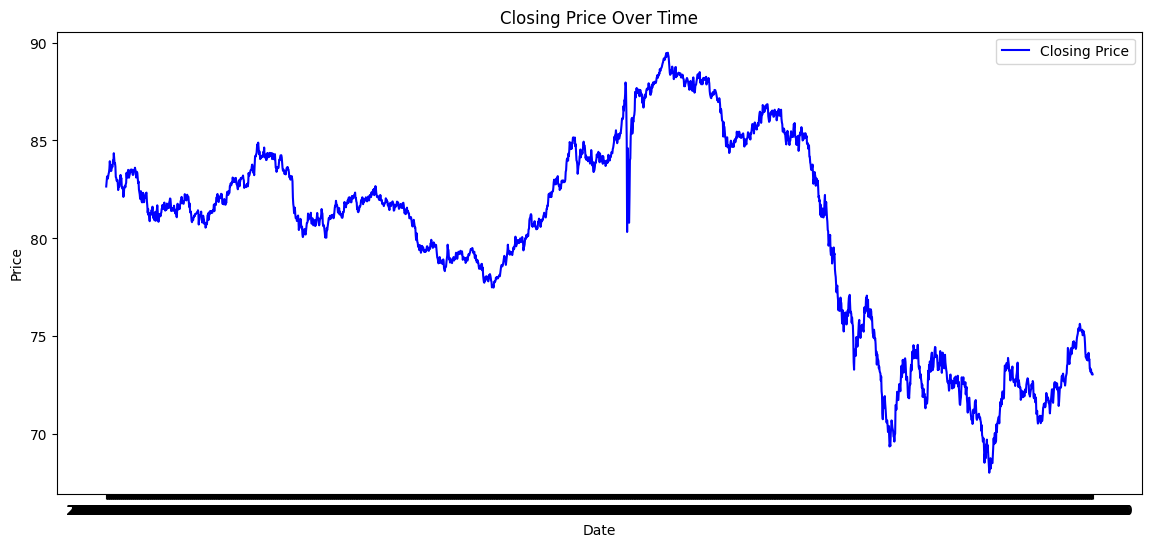

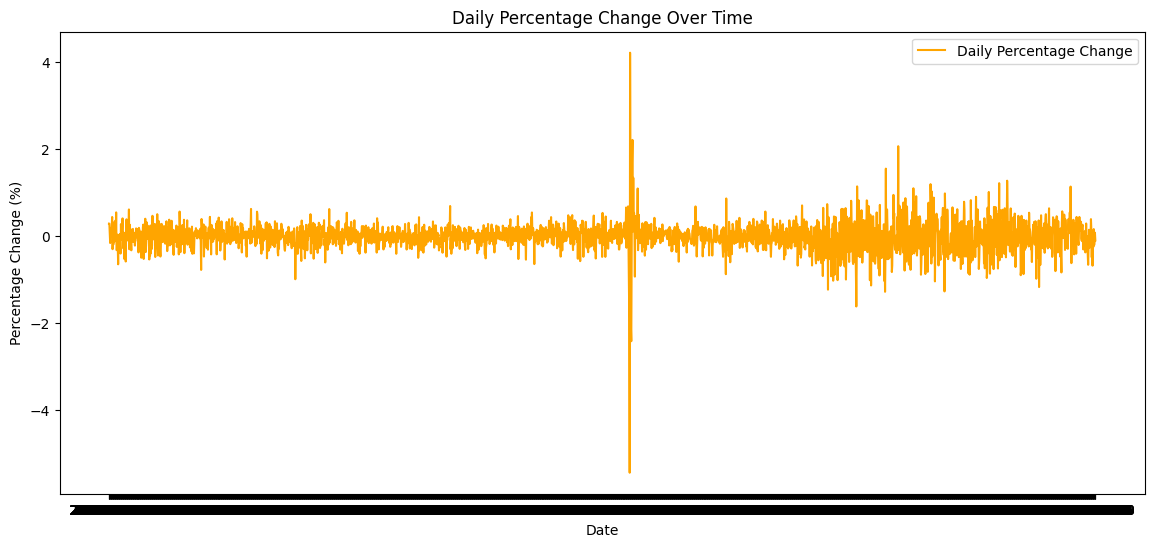

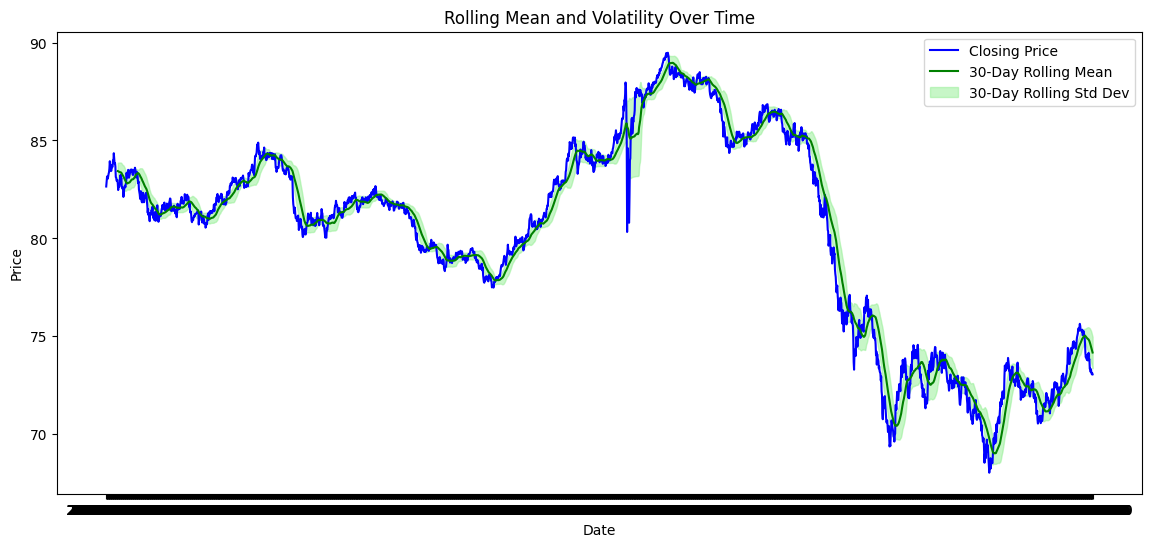

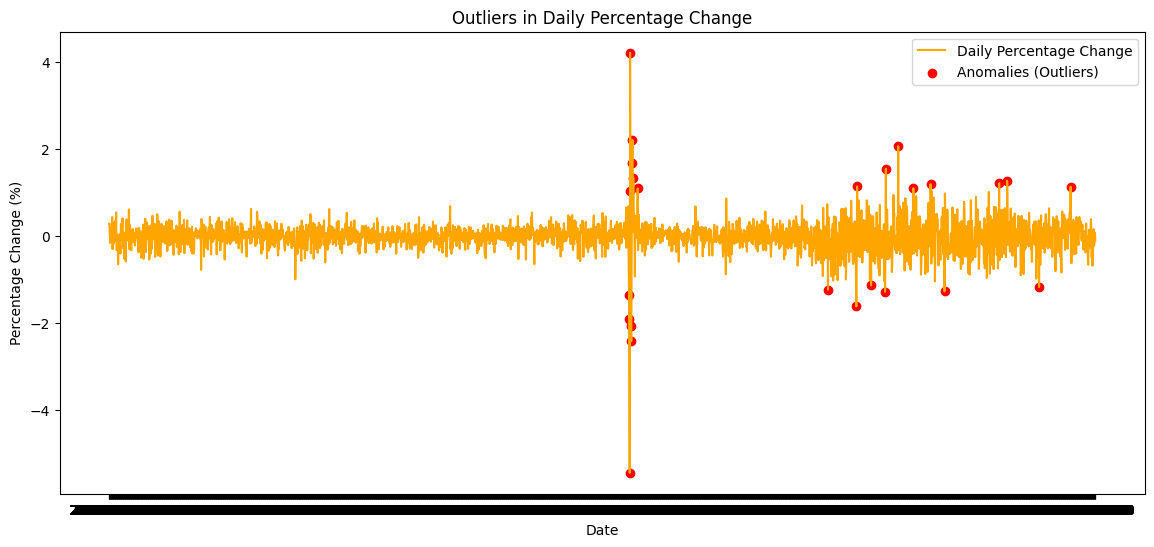

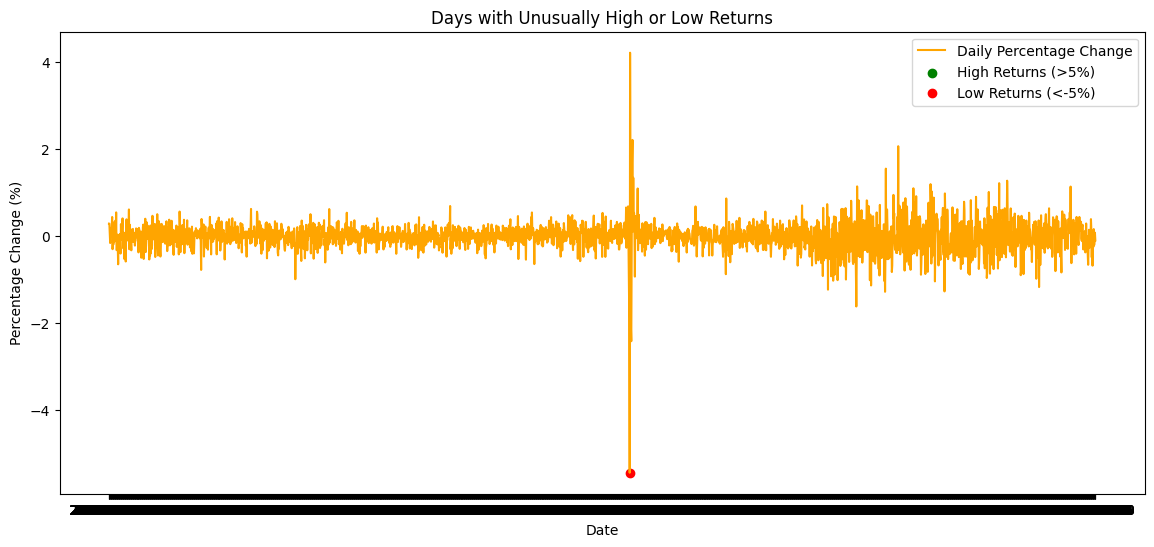

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df.set_index('Date', inplace=True)

# 1. Visualize the Closing Price over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], color='blue', label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. Calculate and plot the daily percentage change to observe volatility
df['Daily Change %'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Daily Change %'], color='orange', label='Daily Percentage Change')
plt.title('Daily Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

# 3. Analyze volatility with rolling mean and rolling standard deviation
# Calculate a 30-day rolling mean and standard deviation for 'Close'
df['Rolling Mean'] = df['Close'].rolling(window=30).mean()
df['Rolling Std'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], color='blue', label='Closing Price')
plt.plot(df.index, df['Rolling Mean'], color='green', label='30-Day Rolling Mean')
plt.fill_between(df.index, 
                 df['Rolling Mean'] - df['Rolling Std'], 
                 df['Rolling Mean'] + df['Rolling Std'], 
                 color='lightgreen', alpha=0.5, label='30-Day Rolling Std Dev')
plt.title('Rolling Mean and Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 4. Outlier detection using Z-score on daily percentage changes
# Anomalies or outliers beyond 3 standard deviations
df['Z-score'] = (df['Daily Change %'] - df['Daily Change %'].mean()) / df['Daily Change %'].std()
outliers = df[np.abs(df['Z-score']) > 3]

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Daily Change %'], color='orange', label='Daily Percentage Change')
plt.scatter(outliers.index, outliers['Daily Change %'], color='red', label='Anomalies (Outliers)', marker='o')
plt.title('Outliers in Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

# 5. Analyze days with unusually high or low returns
# Highlight days with returns greater than 5% or lower than -5%
high_returns = df[df['Daily Change %'] > 5]
low_returns = df[df['Daily Change %'] < -5]

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Daily Change %'], color='orange', label='Daily Percentage Change')
plt.scatter(high_returns.index, high_returns['Daily Change %'], color='green', label='High Returns (>5%)', marker='o')
plt.scatter(low_returns.index, low_returns['Daily Change %'], color='red', label='Low Returns (<-5%)', marker='o')
plt.title('Days with Unusually High or Low Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

Next we proceed to showcasing Seasonality and Trends.

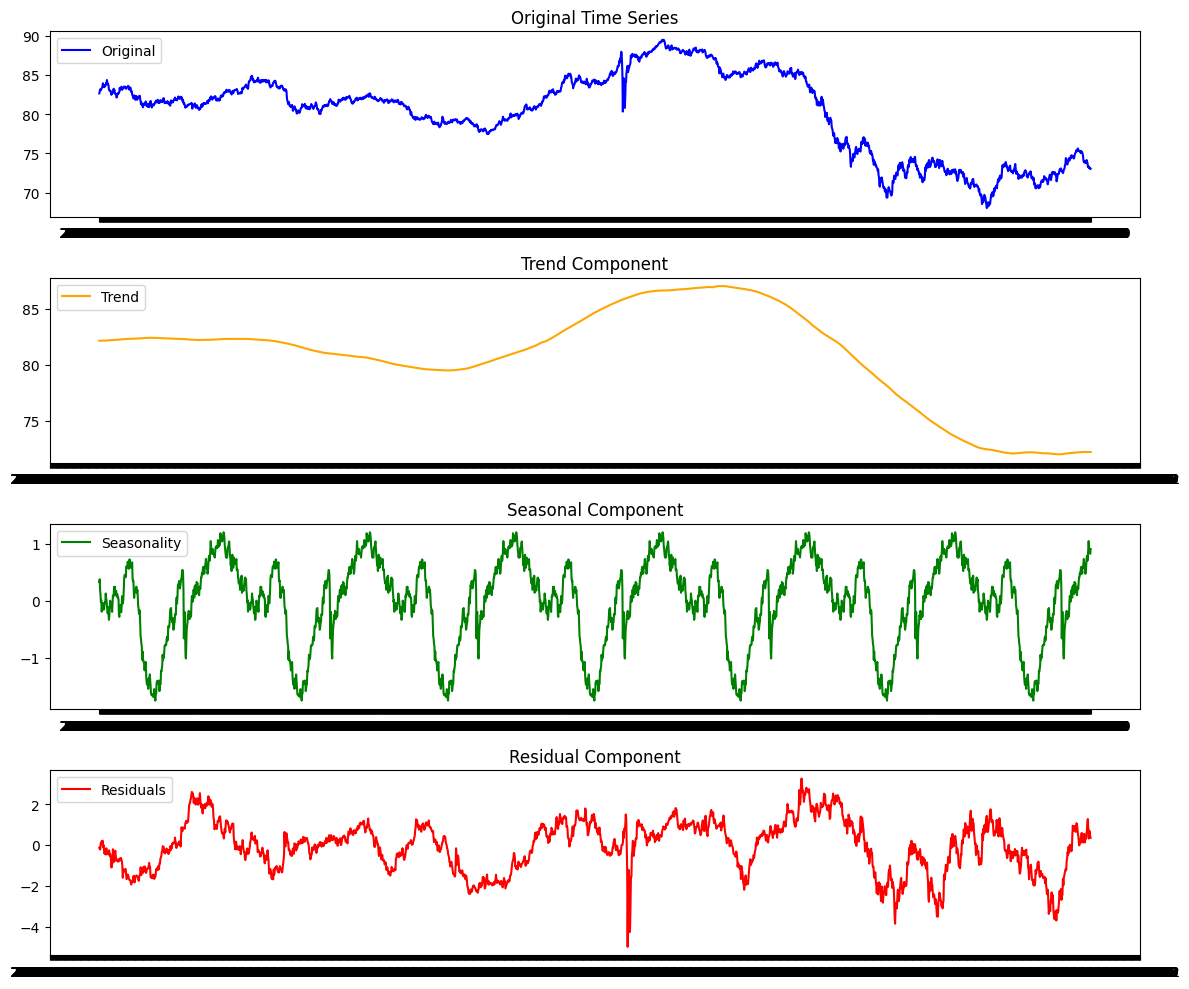

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the 'Date' column is the index and is in datetime format
df_1=pd.read_csv("../data/BND_historical_data.csv")
df_1.set_index('Date', inplace=True)

# Decompose the time series
# Assuming daily frequency data with an annual seasonality period of 365 days
result = seasonal_decompose(df_1['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(df_1['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Next we proceed to analyzing volatility.

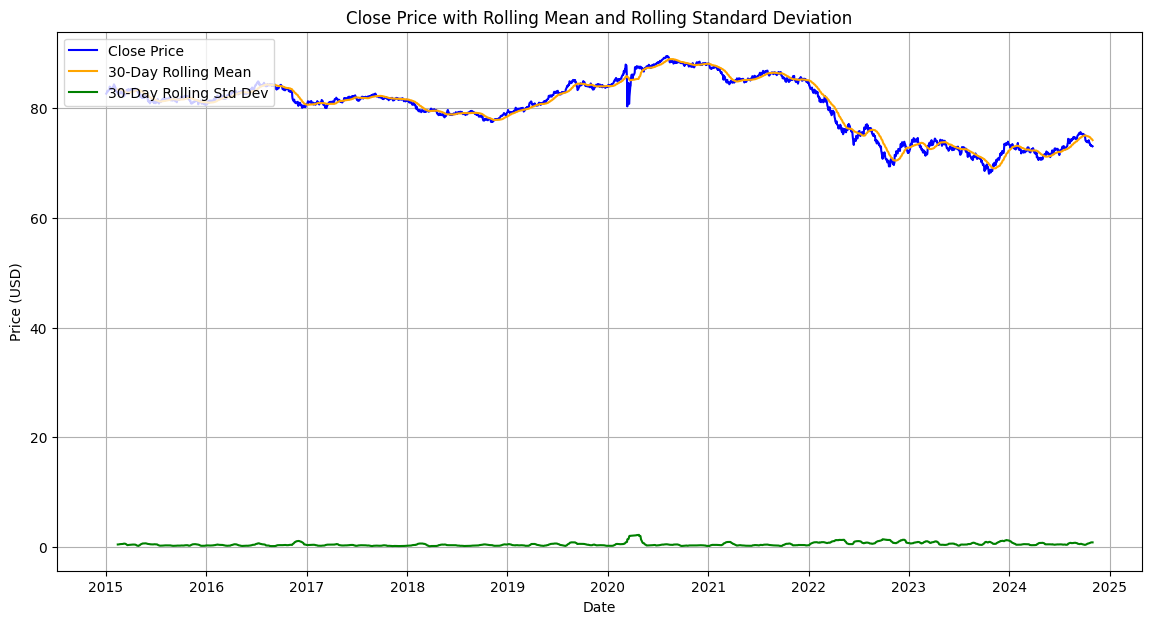

In [14]:

# Load the dataset
df_1 = pd.read_csv("../data/BND_historical_data.csv")
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1.set_index('Date', inplace=True)

# Set the window size (e.g., 30 days) for calculating the rolling mean and standard deviation
window_size = 30

# Calculate the rolling mean and rolling standard deviation
df_1['Rolling_Mean'] = df_1['Close'].rolling(window=window_size).mean()
df_1['Rolling_Std'] = df_1['Close'].rolling(window=window_size).std()

# Plotting the rolling mean and rolling standard deviation to visualize volatility
plt.figure(figsize=(14, 7))

# Plot the original closing price
plt.plot(df_1['Close'], color='blue', label='Close Price')

# Plot the rolling mean
plt.plot(df_1['Rolling_Mean'], color='orange', label=f'{window_size}-Day Rolling Mean')

# Plot the rolling standard deviation
plt.plot(df_1['Rolling_Std'], color='green', label=f'{window_size}-Day Rolling Std Dev')

plt.title('Close Price with Rolling Mean and Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
